<a href="https://www.kaggle.com/code/hossamahmedsalah/arabic-digits?scriptVersionId=137986178" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [92]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib


In [3]:
ar_digit = pd.read_csv('/kaggle/input/arabicindian-digits-madbase/MAHD.csv') 


In [4]:
ar_digit

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,label
0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2
3,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,3
4,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5
69996,69996,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,6
69997,69997,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,7
69998,69998,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,8


In [5]:
ar_digit.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
ar_digit

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,3
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5
69996,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,6
69997,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,7
69998,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,8


In [33]:
renCols = ['Pixel{:03d}'.format(i) for i in range(28*28)]
renCols.append('label')
print(len(renCols))
renCols


785


['Pixel000',
 'Pixel001',
 'Pixel002',
 'Pixel003',
 'Pixel004',
 'Pixel005',
 'Pixel006',
 'Pixel007',
 'Pixel008',
 'Pixel009',
 'Pixel010',
 'Pixel011',
 'Pixel012',
 'Pixel013',
 'Pixel014',
 'Pixel015',
 'Pixel016',
 'Pixel017',
 'Pixel018',
 'Pixel019',
 'Pixel020',
 'Pixel021',
 'Pixel022',
 'Pixel023',
 'Pixel024',
 'Pixel025',
 'Pixel026',
 'Pixel027',
 'Pixel028',
 'Pixel029',
 'Pixel030',
 'Pixel031',
 'Pixel032',
 'Pixel033',
 'Pixel034',
 'Pixel035',
 'Pixel036',
 'Pixel037',
 'Pixel038',
 'Pixel039',
 'Pixel040',
 'Pixel041',
 'Pixel042',
 'Pixel043',
 'Pixel044',
 'Pixel045',
 'Pixel046',
 'Pixel047',
 'Pixel048',
 'Pixel049',
 'Pixel050',
 'Pixel051',
 'Pixel052',
 'Pixel053',
 'Pixel054',
 'Pixel055',
 'Pixel056',
 'Pixel057',
 'Pixel058',
 'Pixel059',
 'Pixel060',
 'Pixel061',
 'Pixel062',
 'Pixel063',
 'Pixel064',
 'Pixel065',
 'Pixel066',
 'Pixel067',
 'Pixel068',
 'Pixel069',
 'Pixel070',
 'Pixel071',
 'Pixel072',
 'Pixel073',
 'Pixel074',
 'Pixel075',
 'Pixel076',

In [34]:
ar_digit.columns = renCols

In [35]:
ar_digit

,Pixel000,Pixel001,Pixel002,Pixel003,Pixel004,Pixel005,Pixel006,Pixel007,Pixel008,Pixel009,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,label
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,3
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5
69996,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,6
69997,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,7
69998,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,8


In [37]:
y = ar_digit['label']
X = ar_digit.drop(columns=['label'])
print(f"y shape: {y.shape}")
print(f"X shape: {X.shape}")

y shape: (70000,)

X shape: (70000, 784)


# Functions

In [70]:
def show_images(n, dataset=X,  MAX_IMGS=300):
    num_cols = 10
    if n % num_cols == 0 and n <= MAX_IMGS:
        images = dataset.iloc[:n].values.reshape(-1, 28, 28)
        num_rows = n // num_cols
        fig, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
        for i in range(num_rows):
            for j in range(num_cols):
                ax[i, j].imshow(images[i * num_cols + j], cmap='gray')
                ax[i, j].axis('off')
        plt.show()
    else:
        print('Invalid number of images')

In [87]:
def show_digits(d, dataset=X):
    if d in list(range(0, 10)):
        where = np.where(y == d)
        for whatYouwant in range(0, 50):
            plt.subplot(5, 10, whatYouwant+1)
            imdata = dataset.iloc[where[0][whatYouwant]].values.reshape(28, 28)
            plt.imshow(imdata, cmap='gray')
            plt.xticks([])
            plt.yticks([])
    

In [96]:
def do_pca(n_component, dataset):
    X = StandardScaler().fit_transform(dataset)
    pca = PCA(n_components=n_component)
    x_pca = pca.fit_transform(X)
    return pca, x_pca

In [117]:
def plot_components(X, y):
   
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
    

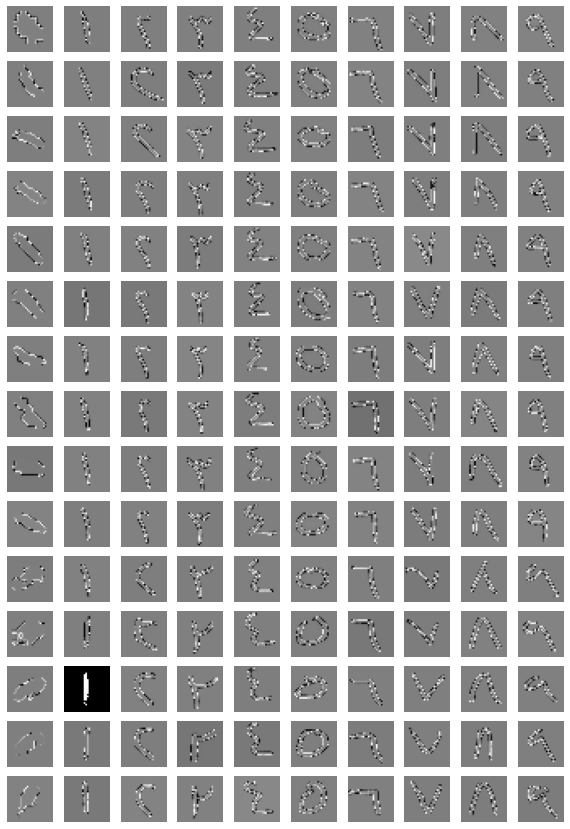

In [72]:
show_images(150)

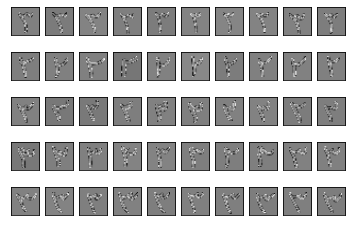

In [88]:
show_digits(3)

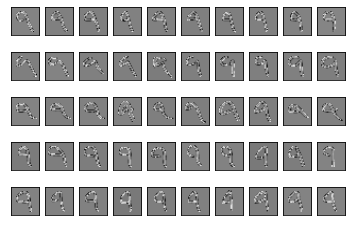

In [89]:
show_digits(9)

In [124]:
def fit_forest(X, y, save = (False, 'model_digitREC'), plot =True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    clf = RandomForestClassifier(n_estimators=130, max_depth=None)
    clf.fit(X_train, y_train)
    # predictions
    y_pred = clf.predict(X_test)
    # scoring
    mat = confusion_matrix(y_test, y_pred)
    if plot:
      print(sns.heatmap(mat, annot=True, linewidths=0.5))
    else:
       print(mat)
    acc = accuracy_score(y_test, y_pred)
    print(acc)
    if save[0]:
        joblib.dump(clf, f'{save[1]}.joblib')
    return acc

AxesSubplot(0.125,0.125;0.62x0.755)

0.9827142857142858


0.9827142857142858

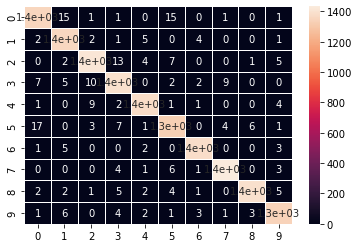

In [95]:
fit_forest(X, y, save=(True, 'forest_to_ar_digit'))

In [112]:
pca, x_pca = do_pca(2, X)

In [113]:
x_pca.shape

(70000, 2)

AxesSubplot(0.125,0.125;0.62x0.755)

0.159


0.159

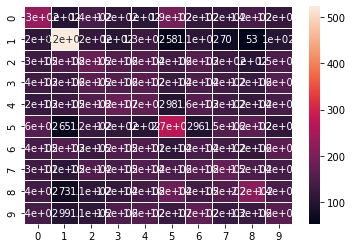

In [114]:
fit_forest(x_pca, y)

In [115]:
x_pca.shape

(70000, 2)

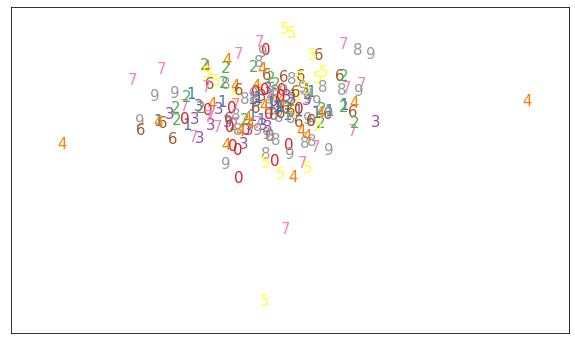

In [ ]:
plot_components(x_pca[:200], y[:200])

# Reducing the feature using PCA

In [125]:
accls = []
for reduced_featured in range(100, 200, 25):
    print(f"number of features {reduced_featured}")
    pca, x_pca = do_pca(reduced_featured, X)
    accls.append(fit_forest(x_pca, y, plot=False))

 
     

number of features 100

[[ 551   83   87   74   54  240   40   57  135   64]

 [  62 1202   38   38    8    1    2    1    0   20]

 [  85   47  674  157  105   63   38   55   67  154]

 [  61   83  175  800   20   35   57   69   37   89]

 [  79   76  118   37  858   44    9   31   64   74]

 [  95    3   54   28   81  810   36   88  136   37]

 [  46   45   57   87    5   17  911   58   17  150]

 [  69    9   87   71   77   76  213  720   50   76]

 [  90   12  103   52  149  110   22   34  699  141]

 [  50   45  172   72   52   57  101   38   95  679]]

0.5645714285714286

number of features 125

[[ 576   51  107   69   55  232   44   70  118   63]

 [  54 1215   34   40    4    0    2    2    0   21]

 [  74   50  689  174  124   55   29   56   54  140]

 [  69   83  191  779   27   31   49   82   24   91]

 [  45   63  141   39  874   41   12   35   60   80]

 [  97    1   56   30   89  849   24   57  126   39]

 [  28   34   76   71   10   14  939   56   16  149]

 [  60   12  

In [126]:
# till now bad acc
accls

[0.5645714285714286,
 0.5762857142857143,
 0.5814285714285714,
 0.5930714285714286]

In [128]:
for reduced_featured in range(200, 300, 50):
    print(f"number of features {reduced_featured}")
    pca, x_pca = do_pca(reduced_featured, X)
    accls.append(fit_forest(x_pca, y, plot=False))


number of features 200

[[ 589   54   86   60   59  261   33   69  123   51]

 [  41 1231   27   41    9    0    2    3    1   17]

 [  70   33  722  186  117   49   23   53   46  146]

 [  53   80  196  837   12   26   52   76   26   68]

 [  57   69  144   39  880   33    8   34   49   77]

 [ 108    3   53   29   71  864   19   83   97   41]

 [  24   31   57   76   11   12  972   61   17  132]

 [  47    9   84   64   45   71  227  800   36   65]

 [  81    9   94   39  149  107   12   22  766  133]

 [  40   43  170   73   49   59   99   36   84  708]]

0.5977857142857143

number of features 250

[[ 601   63   82   60   57  235   35   67  141   44]

 [  54 1214   35   37    6    0    1    2    0   23]

 [  51   29  748  165  121   45   17   53   64  152]

 [  46   80  197  834   13   28   45   80   19   84]

 [  53   56  147   38  911   33   10   39   43   60]

 [ 115    1   46   28   81  876   16   67  113   25]

 [  23   26   48   70   11   10  992   61   12  140]

 [  67    5  

In [130]:
def tryPCA(start, end, step):
    for reduced_featured in range(start, end, step):
        print(f"number of features {reduced_featured}")
        pca, x_pca = do_pca(reduced_featured, X)
        accls.append(fit_forest(x_pca, y, plot=False))


In [131]:
tryPCA(400, 600, 100)

number of features 400

[[ 584   53   95   58   58  253   36   64  134   50]

 [  44 1223   40   38    6    0    1    3    2   15]

 [  65   23  791  161  125   43   18   61   41  117]

 [  60   77  188  839   12   24   49   61   24   92]

 [  42   64  138   36  960   25    4   32   35   54]

 [ 106    2   45   28   68  912   18   50  119   20]

 [  23   33   56   69    5   10  997   62   15  123]

 [  48   10   86   74   59   51  211  842   20   47]

 [  58    6   77   39  171  108   10   13  815  115]

 [  36   38  166   59   60   56   92   27   80  747]]

0.6221428571428571

number of features 500

[[ 598   53   68   51   63  244   35   61  150   62]

 [  57 1219   30   34   10    0    1    3    0   18]

 [  55   29  780  159  134   36   25   56   41  130]

 [  44   77  197  856    9   25   44   79   17   78]

 [  43   62  143   38  955   29    7   27   38   48]

 [ 104    1   50   23   68  902   13   58  130   19]

 [  28   34   41   73    7    7 1021   42    9  131]

 [  56    7  

So we reached a bottle neck for 62% the reduction of features here didn't help us in this case in minsit it works mayber the data need to be preprossed more